# PCA

## Importing Data and Libraries

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df_pca = pd.read_csv("DataPCA.csv")

## a. Visualizing Data

Object and data types

In [16]:
display(df_pca)
df_pca.info(verbose=True)

,x1,x2,x3,x4,x5,x6,x7
0,0.840261,-1.088160,4.861744,4.273055,4.312457,-0.137834,0.076453
1,1.320591,-1.174113,5.247360,3.295027,4.283410,-0.363759,-0.170605
2,1.537909,-1.175882,5.556251,3.394183,3.971574,-0.888398,0.080617
3,0.363552,-1.130608,4.329890,5.547488,4.539732,0.342330,0.251953
4,1.567938,-1.114719,5.542104,2.493071,4.156157,-0.609694,-0.291367
...,...,...,...,...,...,...,...
185,0.894296,-1.270097,4.618647,4.005702,4.634847,0.156118,-0.215169
186,0.926559,-1.203508,4.766199,3.907673,4.538084,0.073321,-0.197924
187,1.678706,-1.227245,5.613809,2.864530,4.046335,-0.906304,-0.099063
188,1.693254,-1.323340,5.470576,3.023584,4.208331,-0.693895,-0.189082


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      190 non-null    float64
 1   x2      190 non-null    float64
 2   x3      190 non-null    float64
 3   x4      190 non-null    float64
 4   x5      190 non-null    float64
 5   x6      190 non-null    float64
 6   x7      190 non-null    float64
dtypes: float64(7)
memory usage: 10.5 KB


All the data types are float64 and they are all no null values

In [17]:
def dispEntryInfo(df): #Function which displays Data type, number of unique entries, number of null entries of each column in a Pandas DataFrame df
    for col in df.columns.values: # For each column
        unique_vals = pd.unique(df[col]) # Creating list of unique values
        print(f"{col}:\t {len(unique_vals)} unique entries.") # Printing data regarding the column: Data type, number of unique values and number of null entries
        if len(unique_vals) <= 10: #If there are <= 10 unique values
            print(f"\tThese are: {unique_vals}\n")

In [18]:
dispEntryInfo(df_pca)

x1:	 190 unique entries.
x2:	 190 unique entries.
x3:	 190 unique entries.
x4:	 190 unique entries.
x5:	 190 unique entries.
x6:	 190 unique entries.
x7:	 190 unique entries.


All the values are unique

### Histograms and Scatterplots

In [19]:
def plotAllHist(df):
    for col in df.columns.values: # For each column in dataset
        print(df[col].dtypes)
        plt.hist(df[col])
        plt.xlabel(col)
        plt.show()

In [20]:
def plotPairWiseScatter(df_clust):
    for j in range(len(df_clust.columns)):
        for i in range(j+1, len(df_clust.columns)):
            plt.scatter(df_clust[df_clust.columns[j]], df_clust[df_clust.columns[i]])
            plt.xlabel(df_clust.columns[j])
            plt.ylabel(df_clust.columns[i])
            plt.show()

float64


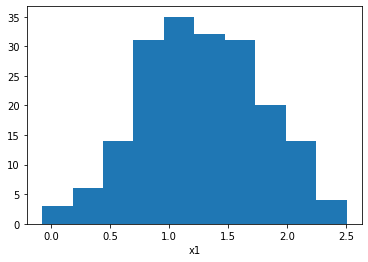

float64


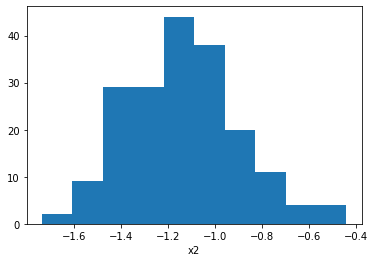

float64


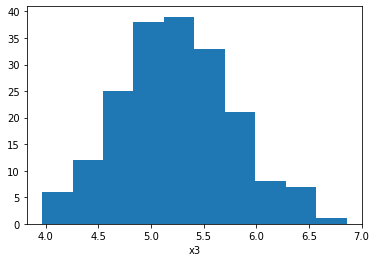

float64


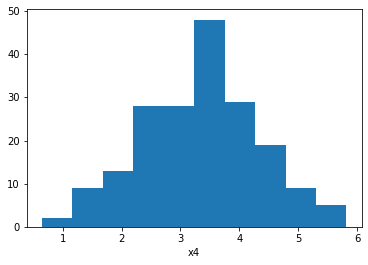

float64


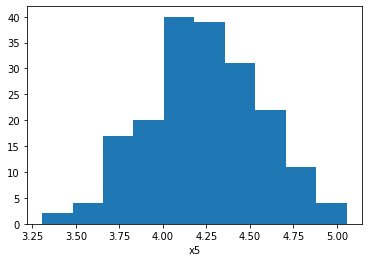

float64


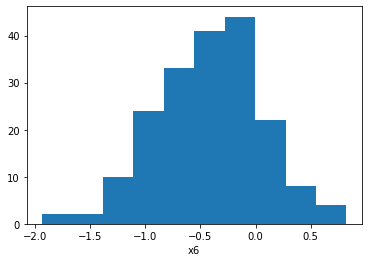

float64


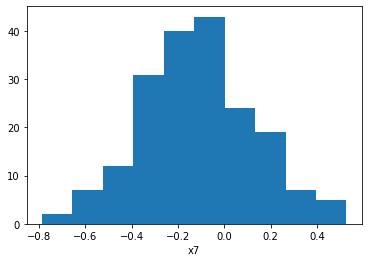

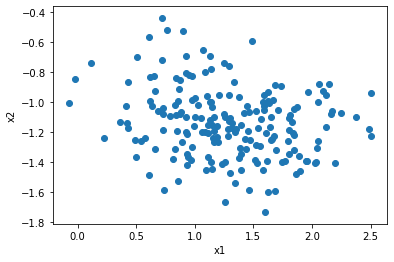

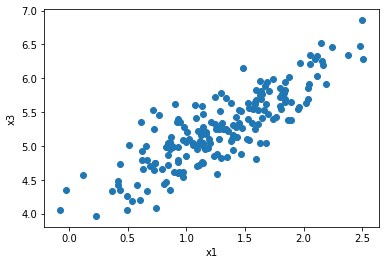

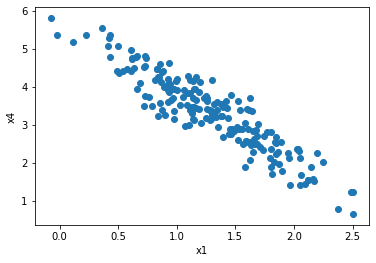

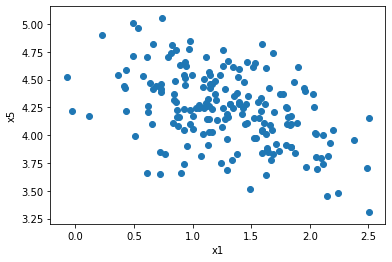

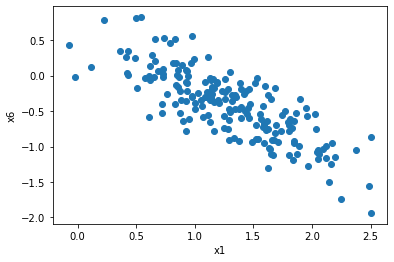

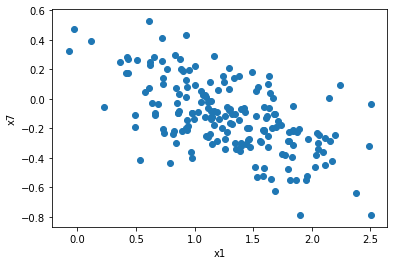

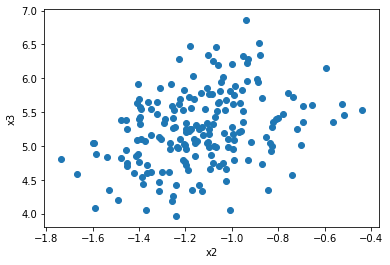

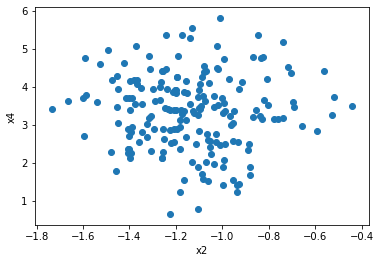

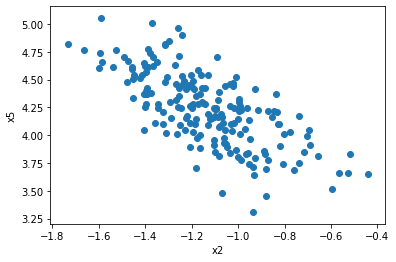

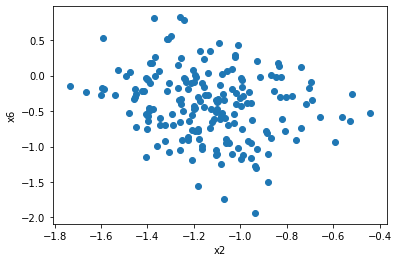

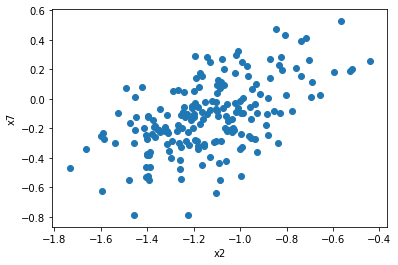

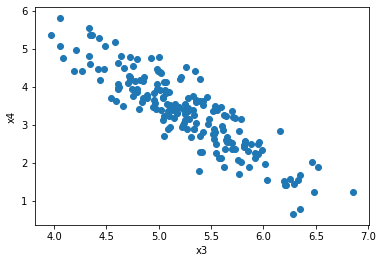

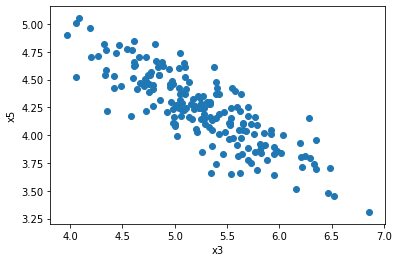

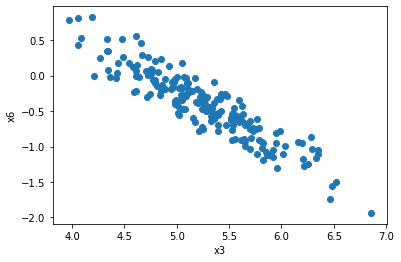

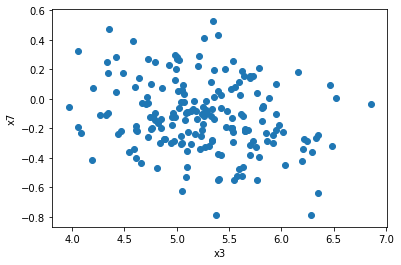

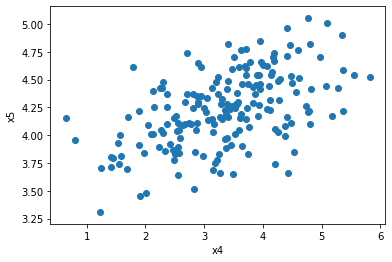

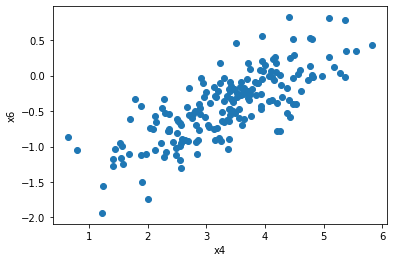

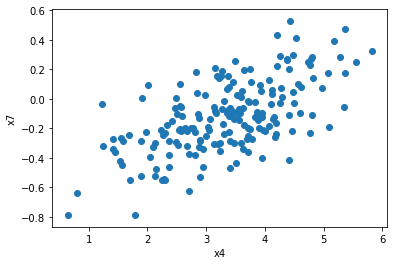

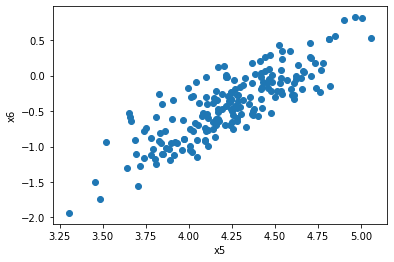

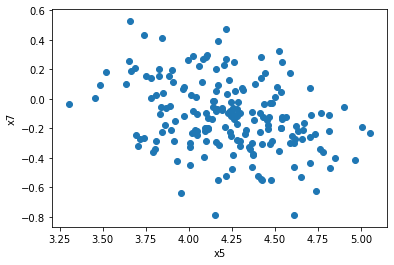

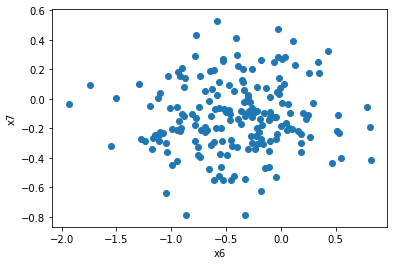

In [21]:
plotAllHist(df_pca)
plotPairWiseScatter(df_pca)

Histograms are centralized and well scattered data

## b,c&d. Training PCA, Plot of variance vs PCA dimensions, Reconstruction and MSE computation

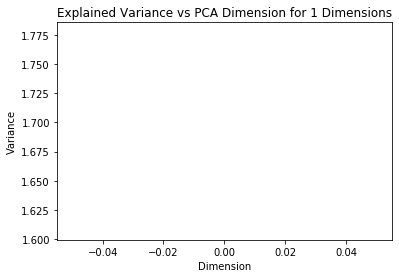

Score: -1.30275177604246
Mean Squared Error for 1 dimension PCA = 0.044263372631700874



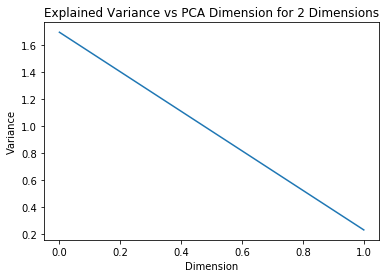

Score: 0.9295928667719364
Mean Squared Error for 2 dimension PCA = 0.011187737930647786



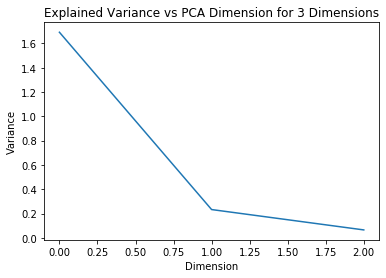

Score: 3.285222552799798
Mean Squared Error for 3 dimension PCA = 0.0019326899390266071



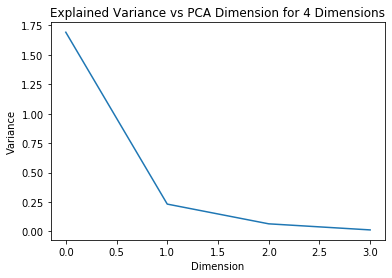

Score: 8.402248668325853
Mean Squared Error for 4 dimension PCA = 3.0289543947376685e-05



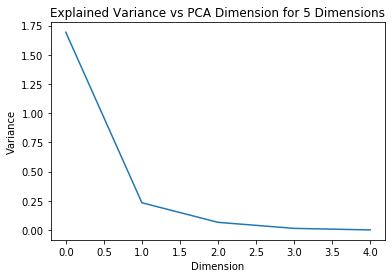

Score: 9.344061177813336
Mean Squared Error for 5 dimension PCA = 4.9722708332804765e-06



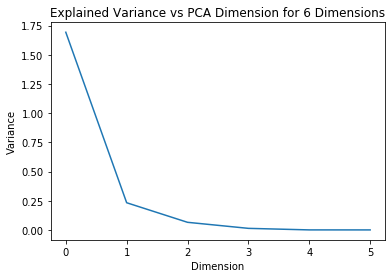

Score: 9.864395584437418
Mean Squared Error for 6 dimension PCA = 4.867173130666536e-07



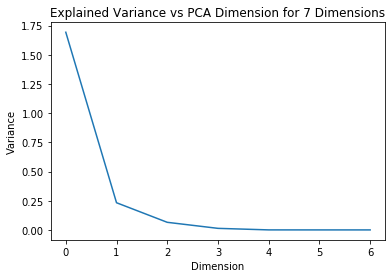

Score: 9.864395584437688
Mean Squared Error for 7 dimension PCA = 1.057110291771386e-31



In [22]:
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error as MSE

pca = PCA()

n_comp_range = np.arange(1,8)

for n_comp in n_comp_range:
    pca.set_params(n_components=n_comp)
    df_red_pca = pca.fit_transform(df_pca)
    plt.plot(pca.explained_variance_)
    plt.title(f"Explained Variance vs PCA Dimension for {n_comp} Dimensions")
    plt.xlabel("Dimension")
    plt.ylabel("Variance")
    plt.show()

    print(f"Score: {pca.score(df_pca)}")

    recon_data = pca.inverse_transform(df_red_pca)
    mse = MSE(df_pca, recon_data)
    print(f"Mean Squared Error for {n_comp} dimension PCA = {mse}\n")

As dimensions keep increasing MSE keeps decreasing